<a href="https://colab.research.google.com/github/lingamnikhil/ML_Assignment1/blob/main/Nikhil_Lingam_ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Convert to DataFrame
breast_input = pd.DataFrame(X, columns=breast.feature_names)
breast_input['diagnosis'] = y

# View the first few rows
print(breast_input.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Problem 1:
i)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
# Load the breast cancer dataset from sklearn
data = load_breast_cancer()

# Features and target
X = data.data
y = data.target

# Create a DataFrame for better readability
df = pd.DataFrame(X, columns=data.feature_names)
df['diagnosis'] = y  # 0 = malignant, 1 = benign

# Display first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Features and target separation
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Step 4: Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Step 5: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Step 6: Evaluate the Model
# Predict
y_pred = model.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("=== Logistic Regression Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

=== Logistic Regression Metrics ===
Accuracy : 0.9737
Precision: 0.9722
Recall   : 0.9859


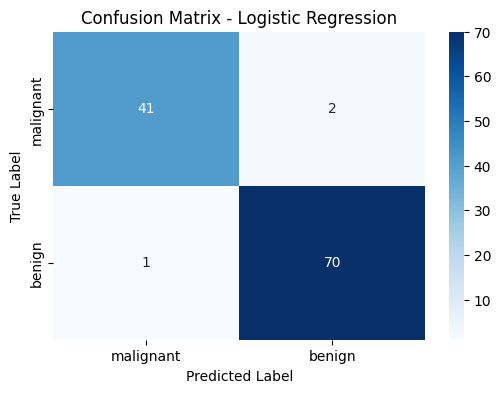

In [ ]:
#Step 7: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ii)


In [ ]:
# Train Logistic Regression model with L2 regularization (weight penalty)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Apply L2 penalty (default) with C=1.0
model_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
model_l2.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on test set
y_pred_l2 = model_l2.predict(X_test_scaled)

# Compute evaluation metrics
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)

# Print results
print("=== Logistic Regression WITH L2 Weight Penalty ===")
print(f"Accuracy : {accuracy_l2:.4f}")
print(f"Precision: {precision_l2:.4f}")
print(f"Recall   : {recall_l2:.4f}")

=== Logistic Regression WITH L2 Weight Penalty ===
Accuracy : 0.9737
Precision: 0.9722
Recall   : 0.9859


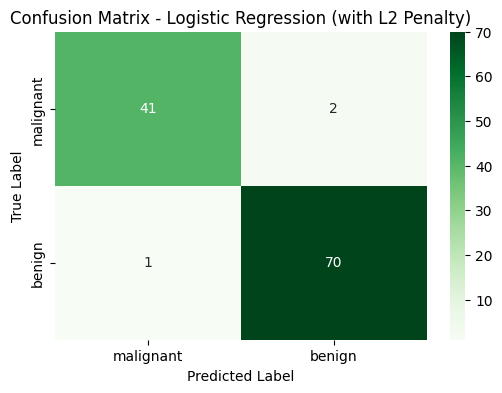

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_l2 = confusion_matrix(y_test, y_pred_l2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_l2, annot=True, fmt="d", cmap="Greens",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - Logistic Regression (with L2 Penalty)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

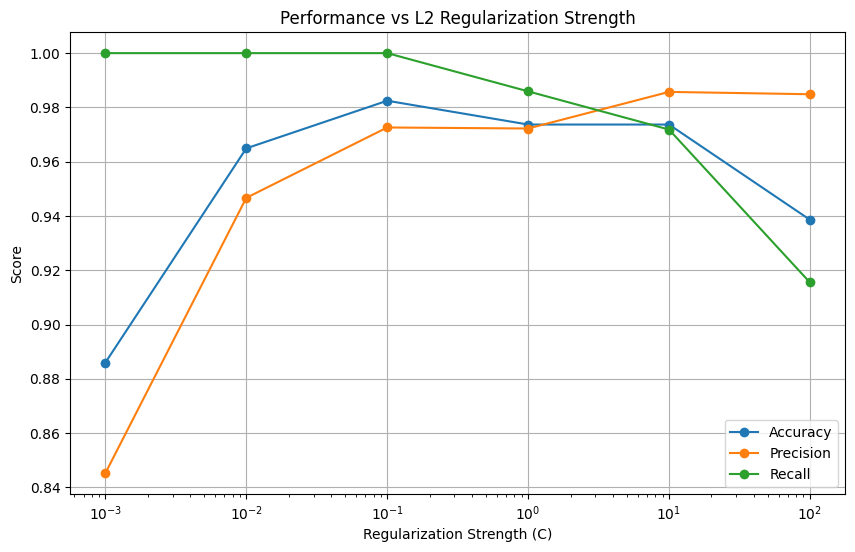

In [ ]:
# Try different regularization strengths (C values)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracy_list = []
precision_list = []
recall_list = []

for C in C_values:
    model = LogisticRegression(penalty='l2', C=C, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_list, marker='o', label='Accuracy')
plt.plot(C_values, precision_list, marker='o', label='Precision')
plt.plot(C_values, recall_list, marker='o', label='Recall')

plt.xscale('log')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Score")
plt.title("Performance vs L2 Regularization Strength")
plt.legend()
plt.grid(True)
plt.show()

Problem 2:
i)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for readability (optional)
df = pd.DataFrame(X, columns=data.feature_names)
df['diagnosis'] = y

# Check the first few rows (optional)
# df.head()

In [ ]:
# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Use GaussianNB for continuous features
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
# Predict
y_pred_nb = nb_model.predict(X_test_scaled)

# Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print("=== Naive Bayes Results ===")
print(f"Accuracy : {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall   : {recall_nb:.4f}")

=== Naive Bayes Results ===
Accuracy : 0.9649
Precision: 0.9589
Recall   : 0.9859


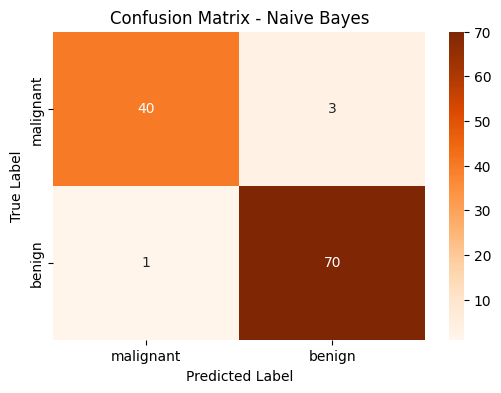

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ii)


In [ ]:
from sklearn.metrics import f1_score

# F1 for Naive Bayes
f1_nb = f1_score(y_test, y_pred_nb)

# F1 for Logistic Regression (assuming y_pred is from earlier)
f1_logreg = f1_score(y_test, y_pred)

# Print all scores (for reference)
print("=== Logistic Regression ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1_logreg:.4f}")

print("\n=== Naive Bayes ===")
print(f"Accuracy : {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall   : {recall_nb:.4f}")
print(f"F1 Score : {f1_nb:.4f}")

=== Logistic Regression ===
Accuracy : 0.9737
Precision: 0.9722
Recall   : 0.9859
F1 Score : 0.9489

=== Naive Bayes ===
Accuracy : 0.9649
Precision: 0.9589
Recall   : 0.9859
F1 Score : 0.9722


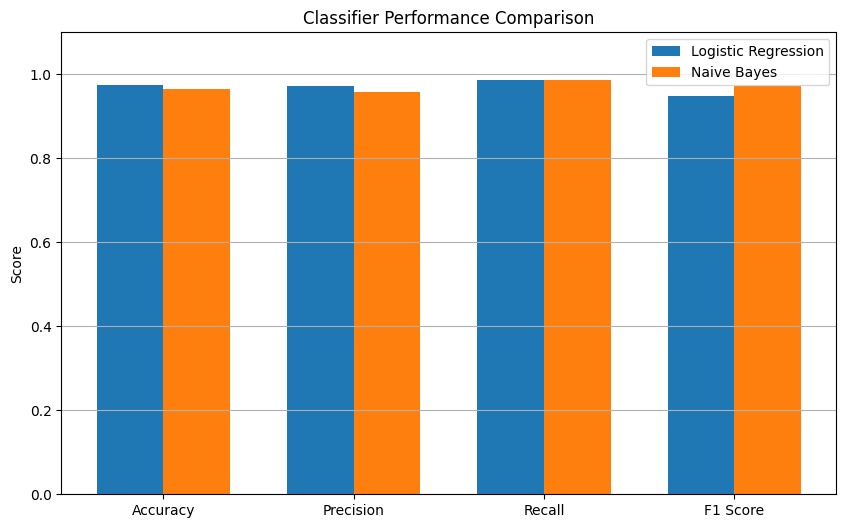

In [ ]:
import matplotlib.pyplot as plt

# Metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Values
logreg_scores = [accuracy, precision, recall, f1_logreg]
nb_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of bars

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, logreg_scores, width, label='Logistic Regression')
plt.bar(x + width/2, nb_scores, width, label='Naive Bayes')

plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0.0, 1.1)
plt.legend()
plt.grid(True, axis='y')
plt.show()

Problem 3: i)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Optional: convert to DataFrame for readability
df = pd.DataFrame(X, columns=data.feature_names)
df['diagnosis'] = y

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Use a linear kernel for simplicity (you can try 'rbf' or 'poly' as well)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
# Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Compute metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print("=== SVM Classifier Results ===")
print(f"Accuracy : {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall   : {recall_svm:.4f}")

=== SVM Classifier Results ===
Accuracy : 0.9561
Precision: 0.9714
Recall   : 0.9577


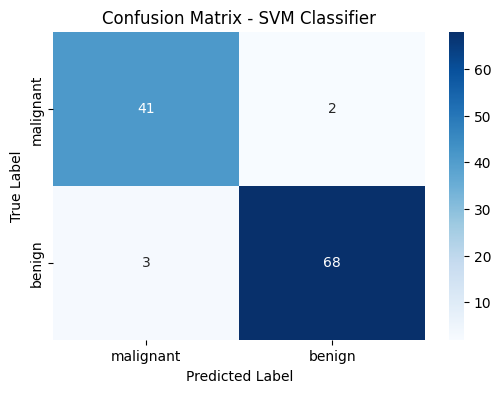

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

ii)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Already predicted:
# y_pred     -> Logistic Regression
# y_pred_nb  -> Naive Bayes
# y_pred_svm -> SVM

# F1 Scores
f1_logreg = f1_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred_nb)
f1_svm = f1_score(y_test, y_pred_svm)

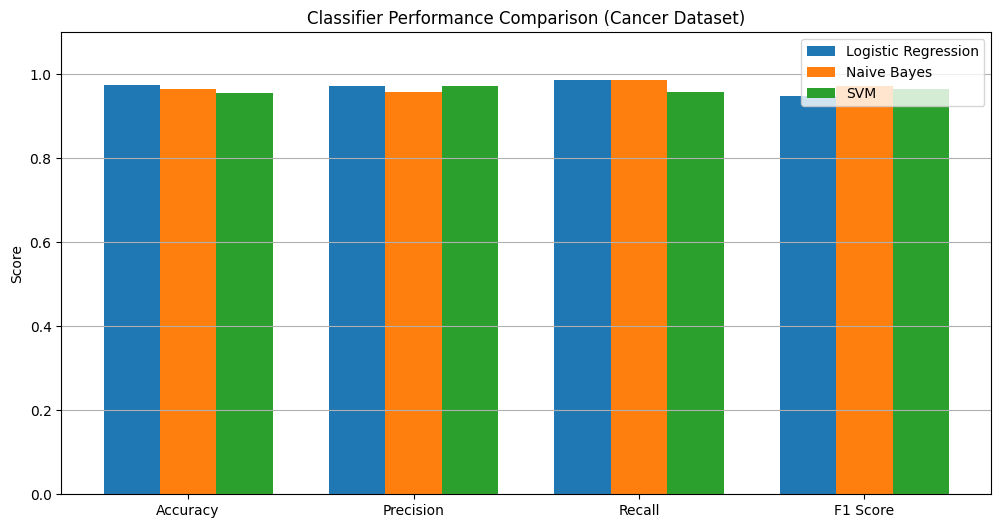

In [ ]:
# Metrics and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logreg_scores = [accuracy, precision, recall, f1_logreg]
nb_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]
svm_scores = [accuracy_svm, precision_svm, recall_svm, f1_svm]

x = np.arange(len(metrics))
width = 0.25

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - width, logreg_scores, width, label='Logistic Regression')
plt.bar(x, nb_scores, width, label='Naive Bayes')
plt.bar(x + width, svm_scores, width, label='SVM')

plt.xticks(x, metrics)
plt.ylim(0.0, 1.1)
plt.ylabel("Score")
plt.title("Classifier Performance Comparison (Cancer Dataset)")
plt.legend()
plt.grid(True, axis='y')
plt.show()

Problem 4:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Store accuracy scores
accuracy_list = []
K_range = range(1, X_train_scaled.shape[1] + 1)

for K in K_range:
    # Apply PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Evaluate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)


In [ ]:
best_k = K_range[np.argmax(accuracy_list)]
best_accuracy = max(accuracy_list)

print(f"Best number of principal components (K): {best_k}")
print(f"Highest classification accuracy: {best_accuracy:.4f}")


Best number of principal components (K): 2
Highest classification accuracy: 0.9912


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
# Reset metric lists
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

K_range = range(1, X_train_scaled.shape[1] + 1)

for K in K_range:
    # PCA transformation
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Record metrics
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))


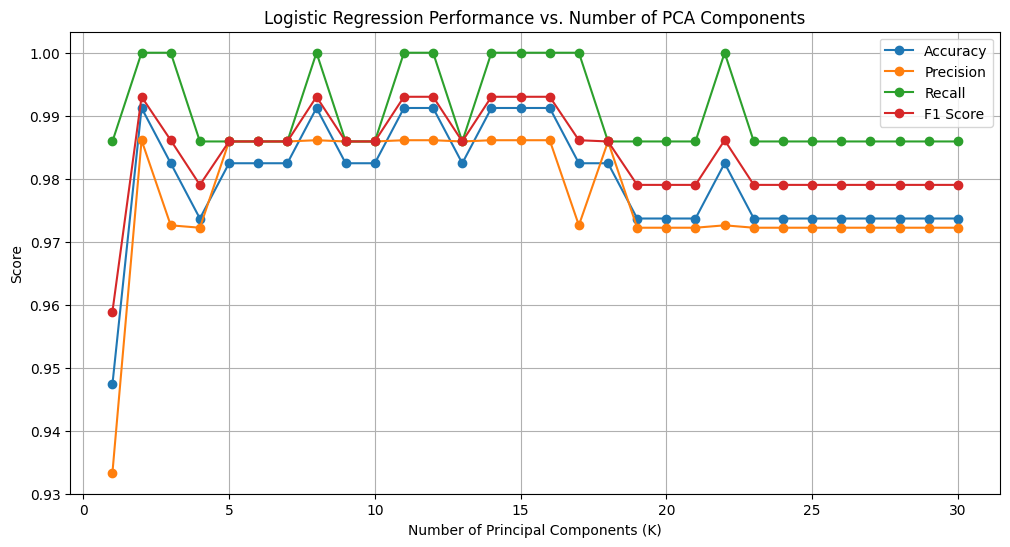

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(K_range, accuracy_list, marker='o', label='Accuracy')
plt.plot(K_range, precision_list, marker='o', label='Precision')
plt.plot(K_range, recall_list, marker='o', label='Recall')
plt.plot(K_range, f1_list, marker='o', label='F1 Score')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Logistic Regression Performance vs. Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()
